In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [15]:
from sklearn.datasets import fetch_california_housing

In [16]:
housing= fetch_california_housing()
print(housing,type(housing))


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [17]:
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [18]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

- there are 20640 samples/data rows
- 8 columns or features
- target variable is median house value

In [19]:
df=pd.DataFrame(housing.data,columns=housing.feature_names) # only input data

In [20]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [21]:
housing['target_names']

['MedHouseVal']

In [22]:
df['MedHouseVal']=housing.target # reading output data

In [23]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [25]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

C:\Users\faizs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


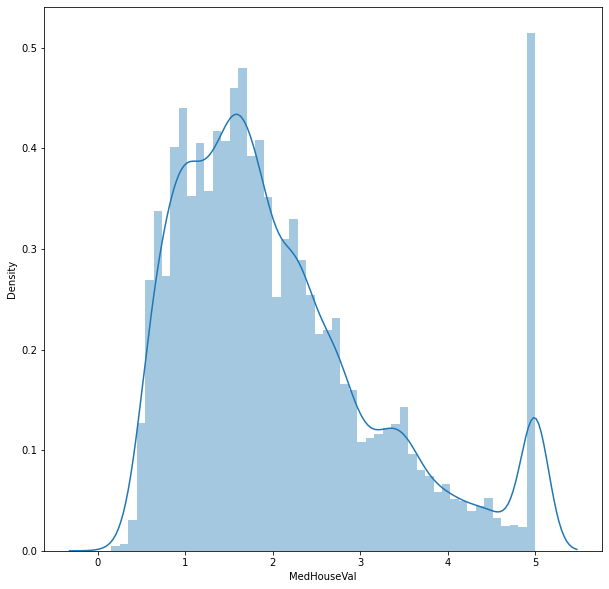

In [26]:
plt.figure(figsize=(10,10))
sns.distplot(df['MedHouseVal'],bins=50)
plt.show()

### Outlier Analysis  

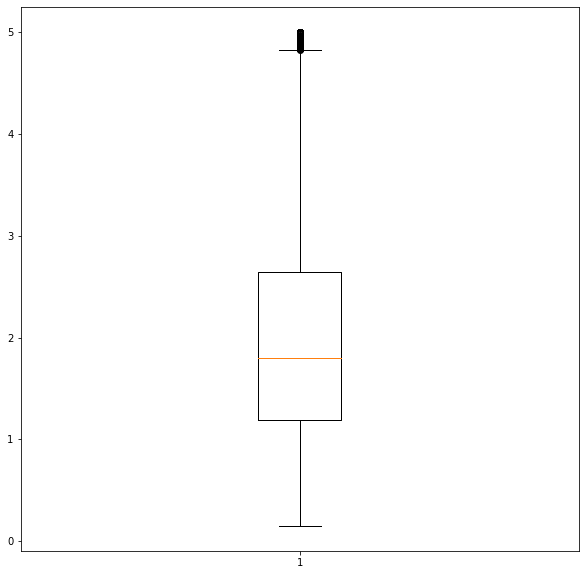

In [27]:
plt.figure(figsize=(10,10))
plt.boxplot(df['MedHouseVal'])
plt.show()

In [28]:
def outlier_analysis(col):
    global q1,q3,lower_bound,upper_bound
    d1=df[col]
    q1=np.quantile(d1,0.25)
    q3=np.quantile(d1,0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    outliers_data=df[(d1<lower_bound) | (d1>upper_bound)]
    print("The lenght of the outlier data is :",len(outliers_data))
    out_perc=(len(outliers_data)/len(df))*100
    print("Percentage of outliers wrt {}:{}".format(col,out_perc))

In [29]:
outlier_analysis('MedHouseVal')

The lenght of the outlier data is : 1071
Percentage of outliers wrt MedHouseVal:5.188953488372093


In [30]:
median=np.median(df['MedHouseVal'])
median

1.797

#### Replacing Outliers with median Values 

In [31]:
df['MedHouseVal']=np.where(df['MedHouseVal']<lower_bound,df['MedHouseVal'].median(),df['MedHouseVal'])
df['MedHouseVal']=np.where(df['MedHouseVal']>upper_bound,df['MedHouseVal'].median(),df['MedHouseVal'])

In [32]:
outlier_analysis('MedHouseVal')

The lenght of the outlier data is : 435
Percentage of outliers wrt MedHouseVal:2.1075581395348837


#### Method-2 

outliers_data=df[(df['MedHouseVal']<lower_bound) | (df['MedHouseVal']>upper_bound)]
outliers_data_list=list(outliers_data['MedHouseVal'].values)
df['MedHouseVal'].replace(outliers_data_list,median,inplace=True)

C:\Users\faizs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


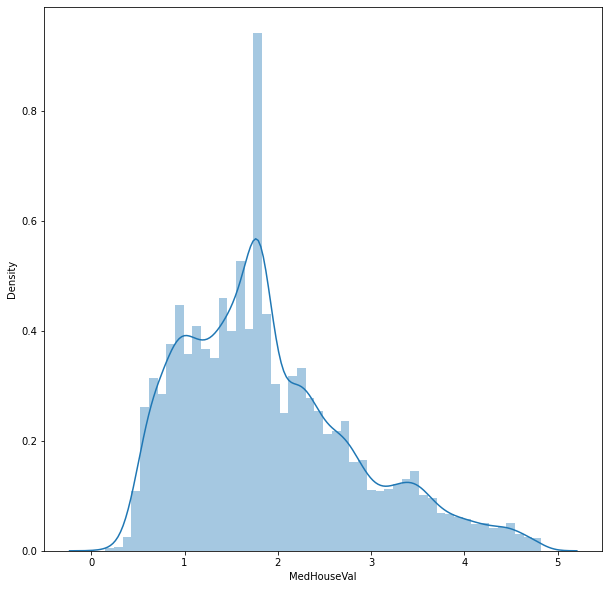

In [33]:
plt.figure(figsize=(10,10))
sns.distplot(df['MedHouseVal'],bins=50)
plt.show()

<AxesSubplot:>

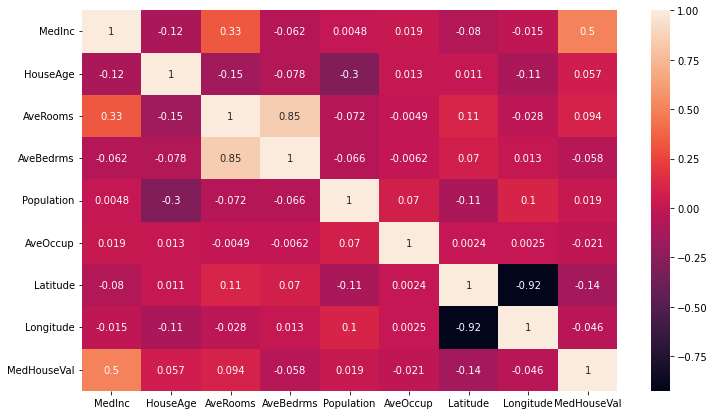

In [34]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

In [35]:
pd.DataFrame(df.corr()['MedHouseVal'].round(2).drop('MedHouseVal')).sort_values(by='MedHouseVal')

,MedHouseVal
Latitude,-0.14
AveBedrms,-0.06
Longitude,-0.05
AveOccup,-0.02
Population,0.02
HouseAge,0.06
AveRooms,0.09
MedInc,0.50


#### ML Steps

- separate input data and output data

In [36]:
X=df.drop('MedHouseVal',axis=1)
y=df['MedHouseVal']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=1234)

In [39]:
X_train.shape

(16512, 8)

#### Applying the model 

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [42]:
linear_model=LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

In [43]:
y_test_predictions=linear_model.predict(X_test)
y_test_predictions

array([2.23606134, 2.30816604, 2.26297435, ..., 0.92288657, 2.15161111,
       1.44124852])

In [45]:
Y_test.values[:5]

array([1.797, 2.939, 4.125, 1.576, 3.041])

In [51]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

mse=mean_squared_error(Y_test,y_test_predictions)
rmse=np.sqrt(mse)
r_square= r2_score(Y_test,y_test_predictions)
print("MSE:",mse)
print('RMSE:',rmse)
print("R_Square:",r_square)

MSE: 0.5102664009872737
RMSE: 0.7143293365019203
R_Square: 0.4081516777216584


##  Pickle-ing
###### Used save the model

In [52]:
import pickle

In [54]:
pickle.dump(linear_model,open('model.pkl','wb'))

#### loading the model 

In [55]:
model=pickle.load(open('model.pkl','rb'))

In [56]:
model.predict(X_test)

array([2.23606134, 2.30816604, 2.26297435, ..., 0.92288657, 2.15161111,
       1.44124852])